# Urban Displacement Project Data Exploration

The Urban Displacement Project used data about the change of neighborhood demographics to create a typology to describe the risk of gentrification and displacement of lower income communities. This notebook includes pulling the data into a dataframe, and running some brief exploration on the data to see how large it is, and what types of categories are present in the data.

The following cell pulls in the necessary libraries to work with the data (pandas and geopandas) both of which read data in a tabular way for analysis.

In [1]:
import pandas as pd
import geopandas as gpd

### Read data to to data frame

Because the data is held as a geopackage we must read the file with geopandas.
I then call the `.head()` method to see the first rows of the dataframe

In [28]:
gdf = gpd.read_file('losangeles.gpkg', epsg='4326')
gdf.head()

,GEOID,Typology,geometry
0,6.037129e+09,Stable Moderate/Mixed Income,"MULTIPOLYGON (((-118.44870 34.16486, -118.4399..."
1,6.037132e+09,Stable Moderate/Mixed Income,"MULTIPOLYGON (((-118.56229 34.22033, -118.5535..."
2,6.037134e+09,At Risk of Becoming Exclusive,"MULTIPOLYGON (((-118.57103 34.21559, -118.5710..."
3,6.037134e+09,Advanced Gentrification,"MULTIPOLYGON (((-118.61472 34.21952, -118.6059..."
4,6.037242e+09,Low-Income/Susceptible to Displacement,"MULTIPOLYGON (((-118.25413 33.94187, -118.2536..."


The head method shows that the data is in a format of a typology field (almost definitely a string), a polygon geometry for each, and a GEOID to record unique records.

### Data Exploration

Next we will explore more about the datatypes and other detail in the dataframe

In [3]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3545 entries, 0 to 3544
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   GEOID     3545 non-null   float64 
 1   Typology  3545 non-null   object  
 2   geometry  3545 non-null   geometry
dtypes: float64(1), geometry(1), object(1)
memory usage: 83.2+ KB


The data includes the three columns, including a float for the GEOID, an object (string) field that is the typology, and a geopandas specific datatype (geometry) that is useful for mapping.

Next we will explore the shape of the data to determine the number of records in the data. This would also be useful if we had more columns to understand the full extend of the number of columns.

In [5]:
gdf.shape

(3545, 3)

The data has 3545 records and the three columns that we have been discussing!

But how many records are in each typology? We can use the `.value_counts()` method to see what the typologies are and how many records are in each typology.

In [6]:
gdf['Typology'].value_counts()

Stable Moderate/Mixed Income              792
Low-Income/Susceptible to Displacement    695
Stable/Advanced Exclusive                 675
At Risk of Becoming Exclusive             570
Early/Ongoing Gentrification              208
Advanced Gentrification                   174
Becoming Exclusive                        157
Ongoing Displacement                      118
Unavailable or Unreliable Data             54
At Risk of Gentrification                  52
High Student Population                    50
Name: Typology, dtype: int64

This shows us how many polygon areas in the data are in each category. Based upon the methodolgy that the Urban Displacement Project provides, these areas are at least fairly consistent with census tracts. Therefore this can be understood as the number of census tracts in each category. Most are have stability, but a large number are susceptible to displacement. 

To visualize this data differently, we can plot this data on a bar plot to better compare across categories.

<AxesSubplot:>

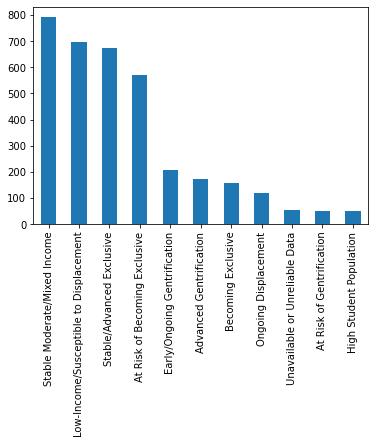

In [10]:
gdf['Typology'].value_counts().plot(kind='bar')

This shows us a graphic way to view the counts of tracts in the given category assigned. But what do we do if we want to only look at data from a subset of categories

We can filter the dataframe to select only records that we are interested. In the case below we will filter the dataframe to only look at records that are in the categories relating to Gentrification. The three stages shown in this data are At Rist, Early/Ongoing, and Advanced. 

In [27]:
gdf.loc[(gdf.Typology == 'Early/Ongoing Gentrification') | (gdf.Typology== 'Advanced Gentrification') |  (gdf.Typology== 'At Risk of Gentrification')]

,GEOID,Typology,geometry
3,6.037134e+09,Advanced Gentrification,"MULTIPOLYGON (((-118.61472 34.21952, -118.6059..."
10,6.037270e+09,Advanced Gentrification,"MULTIPOLYGON (((-118.37721 34.03824, -118.3772..."
16,6.037294e+09,Advanced Gentrification,"MULTIPOLYGON (((-118.29592 33.79778, -118.2889..."
22,6.037302e+09,Advanced Gentrification,"MULTIPOLYGON (((-118.26426 34.14681, -118.2577..."
25,6.037401e+09,Advanced Gentrification,"MULTIPOLYGON (((-117.90895 34.14664, -117.9071..."
...,...,...,...
3494,6.037191e+09,Early/Ongoing Gentrification,"MULTIPOLYGON (((-118.30921 34.09489, -118.3056..."
3522,6.037121e+09,Early/Ongoing Gentrification,"MULTIPOLYGON (((-118.37179 34.22357, -118.3661..."
3531,6.037128e+09,Early/Ongoing Gentrification,"MULTIPOLYGON (((-118.43998 34.18666, -118.4312..."
3534,6.037105e+09,Advanced Gentrification,"MULTIPOLYGON (((-118.42266 34.24984, -118.4193..."


This output includes only the records in these three categories. We could save this data to a new variable by declaring it if we wanted to use it for future use.